# 3 - Analyse CA

In [1]:
# Importation des librairies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime


from matplotlib import gridspec
from datetime import datetime

In [2]:
# Déclaration d'une fonction
def analyseDataFrame(df):
    """Fonction qui prend en arguments un dataframe pour analyse."""

    name =[x for x in globals() if globals()[x] is df][0]
    print("La dimension de DataFrame « " + name  +" » : " + str(df.shape) + " (lignes, colonnes)\n")
    display(df.info())
    display(df.head())
    display(df.describe().T)
    display(df.nunique())

In [3]:
# Importation du dataFrame 'df_enrichi'
df_enrichi = pd.read_csv("df_enrichi.csv", index_col="date_2", parse_dates= True)

# Vérifier que la première colonne est une idex
df_enrichi.index = pd.to_datetime(df_enrichi.index)

# Trier sur la colonne date
df_enrichi = df_enrichi.sort_index()

# Visualisualisation de df_enrichi
analyseDataFrame(df_enrichi)

La dimension de DataFrame « df_enrichi » : (679111, 11) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 679111 entries, 2021-03-01 00:01:07.843138 to 2023-02-28 23:58:30.792755
Data columns (total 11 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  679111 non-null  int64  
 1   client_id   679111 non-null  object 
 2   sex         679111 non-null  object 
 3   birth       679111 non-null  float64
 4   age         679111 non-null  float64
 5   id_prod     679111 non-null  object 
 6   date        679111 non-null  object 
 7   session_id  679111 non-null  object 
 8   price       679111 non-null  float64
 9   categ       679111 non-null  float64
 10  _merge      679111 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 62.2+ MB


None

,Unnamed: 0,client_id,sex,birth,age,id_prod,date,session_id,price,categ,_merge
date_2,,,,,,,,,,,
2021-03-01 00:01:07.843138,129502,c_329,f,1967.0,55.0,0_1259,2021-03-01 00:01:07.843138,s_1,11.99,0.0,both
2021-03-01 00:02:26.047414,17306,c_664,m,1960.0,62.0,0_1390,2021-03-01 00:02:26.047414,s_2,19.37,0.0,both
2021-03-01 00:02:38.311413,146527,c_580,m,1988.0,34.0,0_1352,2021-03-01 00:02:38.311413,s_3,4.50,0.0,both
2021-03-01 00:04:54.559692,506717,c_7912,f,1989.0,33.0,0_1458,2021-03-01 00:04:54.559692,s_4,6.55,0.0,both
2021-03-01 00:05:18.801198,218220,c_2033,f,1956.0,66.0,0_1358,2021-03-01 00:05:18.801198,s_5,16.49,0.0,both


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,679111.0,339599.602812,196104.276737,0.00,169777.50,339555.00,509332.50,679331.0
birth,679111.0,1977.811149,13.575361,1929.00,1970.00,1980.00,1987.00,2004.0
age,679111.0,44.188851,13.575361,18.00,35.00,42.00,52.00,93.0
price,679111.0,17.454773,18.328998,0.62,8.87,13.99,18.99,300.0
categ,679111.0,0.441953,0.595042,0.00,0.00,0.00,1.00,2.0


Unnamed: 0    679111
client_id       8600
sex                2
birth             76
age               76
id_prod         3265
date          679111
session_id    342275
price           1442
categ              3
_merge             1
dtype: int64

### 3.1 - CA par année

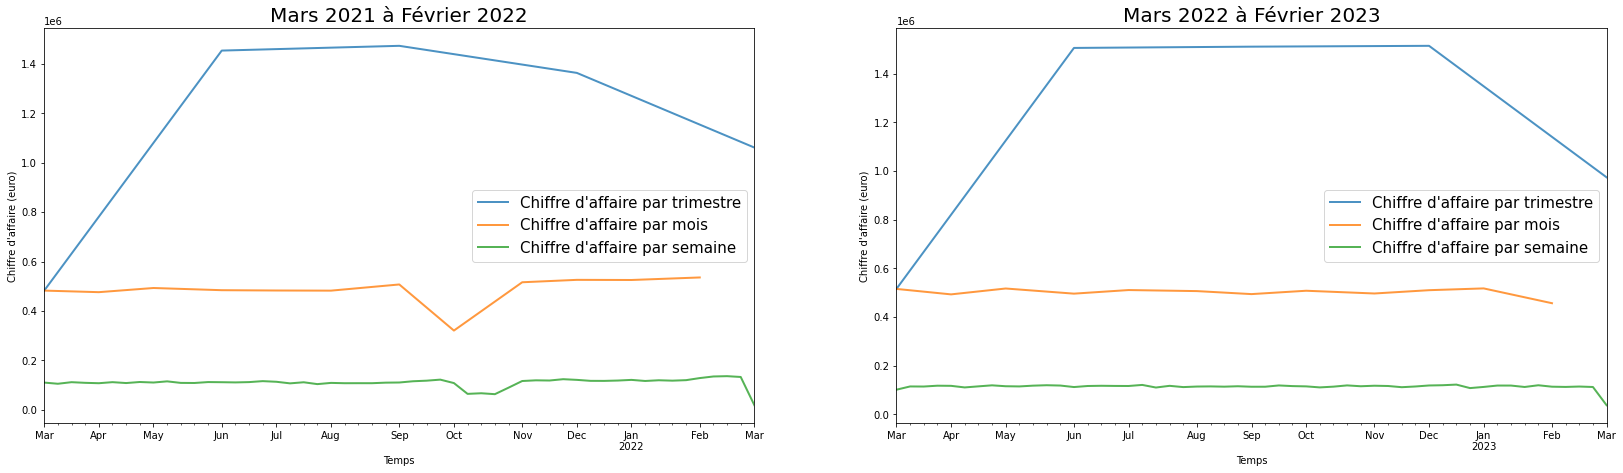

In [4]:
# Visualisation du CA par année
plt.figure(figsize=(28, 16))

# Plot de Mars 202 à Février 2023
plt.subplot(2,2,2)
df_enrichi["2022-03":"2023-02"]["price"].resample("3M").sum().plot(label="Chiffre d'affaire par trimestre", lw=2, ls='-', alpha=0.8)
df_enrichi["2022-03":"2023-02"]["price"].resample("M").sum().plot(label="Chiffre d'affaire par mois", lw=2, ls='-', alpha=0.8)
df_enrichi["2022-03":"2023-02"]["price"].resample("W").sum().plot(label="Chiffre d'affaire par semaine", lw=2, ls='-', alpha=0.8)
plt.title("Mars 2022 à Février 2023",size=20)
plt.xlabel("Temps")
plt.ylabel("Chiffre d'affaire (euro)")
plt.legend(fontsize=15, loc = "center right")

# Plot de Mars 2022 à Février 2023
plt.subplot(2,2,1)
df_enrichi["2021-03":"2022-02"]["price"].resample("3M").sum().plot(label="Chiffre d'affaire par trimestre", lw=2, ls='-', alpha=0.8)
df_enrichi["2021-03":"2022-02"]["price"].resample("M").sum().plot(label="Chiffre d'affaire par mois", lw=2, ls='-', alpha=0.8)
df_enrichi["2021-03":"2022-02"]["price"].resample("W").sum().plot(label="Chiffre d'affaire par semaine", lw=2, ls='-', alpha=0.8)
plt.title("Mars 2021 à Février 2022",size=20)
plt.xlabel("Temps")
plt.ylabel("Chiffre d'affaire (euro)")
plt.legend(fontsize=15, loc = "center right")

plt.show()

### 3.2 - Moyenne CA

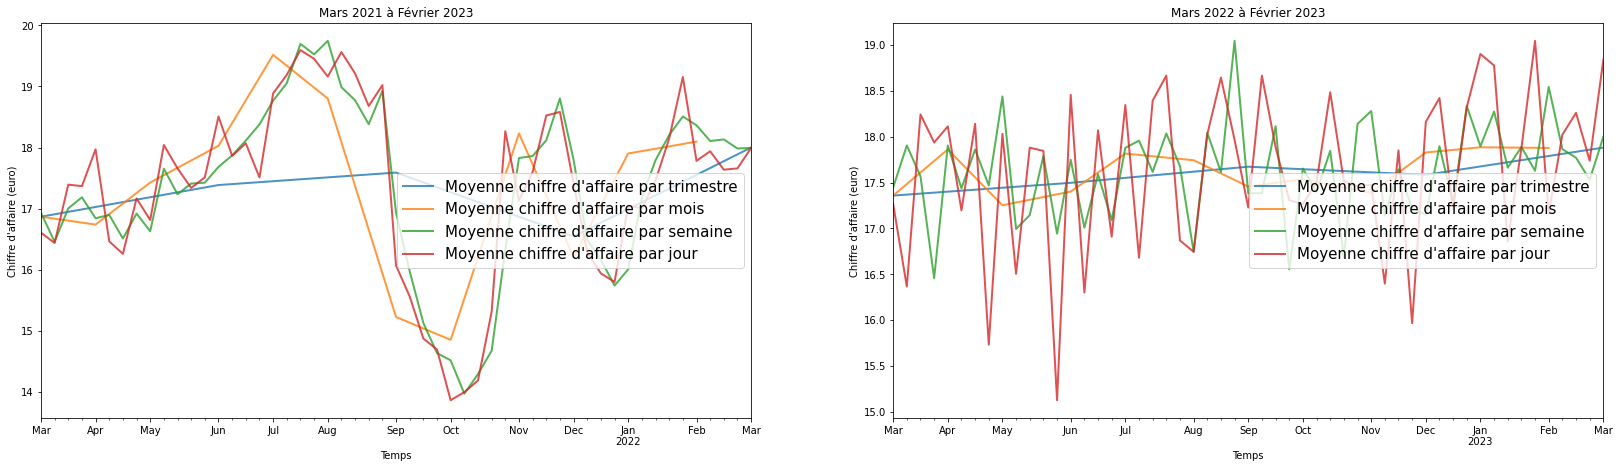

In [5]:
plt.figure(figsize=(28, 16))

# Plot de la moyenne de mars 2022 à Février 2023
plt.subplot(2,2,2)
df_enrichi["2022-03":"2023-02"]["price"].resample("3M").mean().plot(label="Moyenne chiffre d'affaire par trimestre", lw=2, ls='-', alpha=0.8)
df_enrichi["2022-03":"2023-02"]["price"].resample("M").mean().plot(label="Moyenne chiffre d'affaire par mois", lw=2, ls='-', alpha=0.8)
df_enrichi["2022-03":"2023-02"]["price"].resample("W").mean().plot(label="Moyenne chiffre d'affaire par semaine", lw=2, ls='-', alpha=0.8)
df_enrichi["2022-03":"2023-02"]["price"].resample("2D").mean().plot(label="Moyenne chiffre d'affaire par jour", lw=2, ls='-', alpha=0.8)
plt.title("Mars 2022 à Février 2023")
plt.xlabel("Temps")
plt.ylabel("Chiffre d'affaire (euro)")
plt.legend(fontsize=15, loc = "center right")

# Plot de la moyenne de mars 2022 à Février 2023
plt.subplot(2,2,1)
df_enrichi["2021-03":"2022-02"]["price"].resample("3M").mean().plot(label="Moyenne chiffre d'affaire par trimestre", lw=2, ls='-', alpha=0.8)
df_enrichi["2021-03":"2022-02"]["price"].resample("M").mean().plot(label="Moyenne chiffre d'affaire par mois", lw=2, ls='-', alpha=0.8)
df_enrichi["2021-03":"2022-02"]["price"].resample("W").mean().plot(label="Moyenne chiffre d'affaire par semaine", lw=2, ls='-', alpha=0.8)
df_enrichi["2021-03":"2022-02"]["price"].resample("2D").mean().plot(label="Moyenne chiffre d'affaire par jour", lw=2, ls='-', alpha=0.8)
plt.title("Mars 2021 à Février 2023")
plt.xlabel("Temps")
plt.ylabel("Chiffre d'affaire (euro)")
plt.legend(fontsize=15, loc = "center right")

plt.show() 

### 3.3 - CA "categ-price"

In [6]:
# Visualisation de la moyenne par catégorie
moy_categ = round(df_enrichi.groupby("categ")["price"].mean(),2)
moy_categ

categ
0.0    10.64
1.0    20.49
2.0    76.21
Name: price, dtype: float64

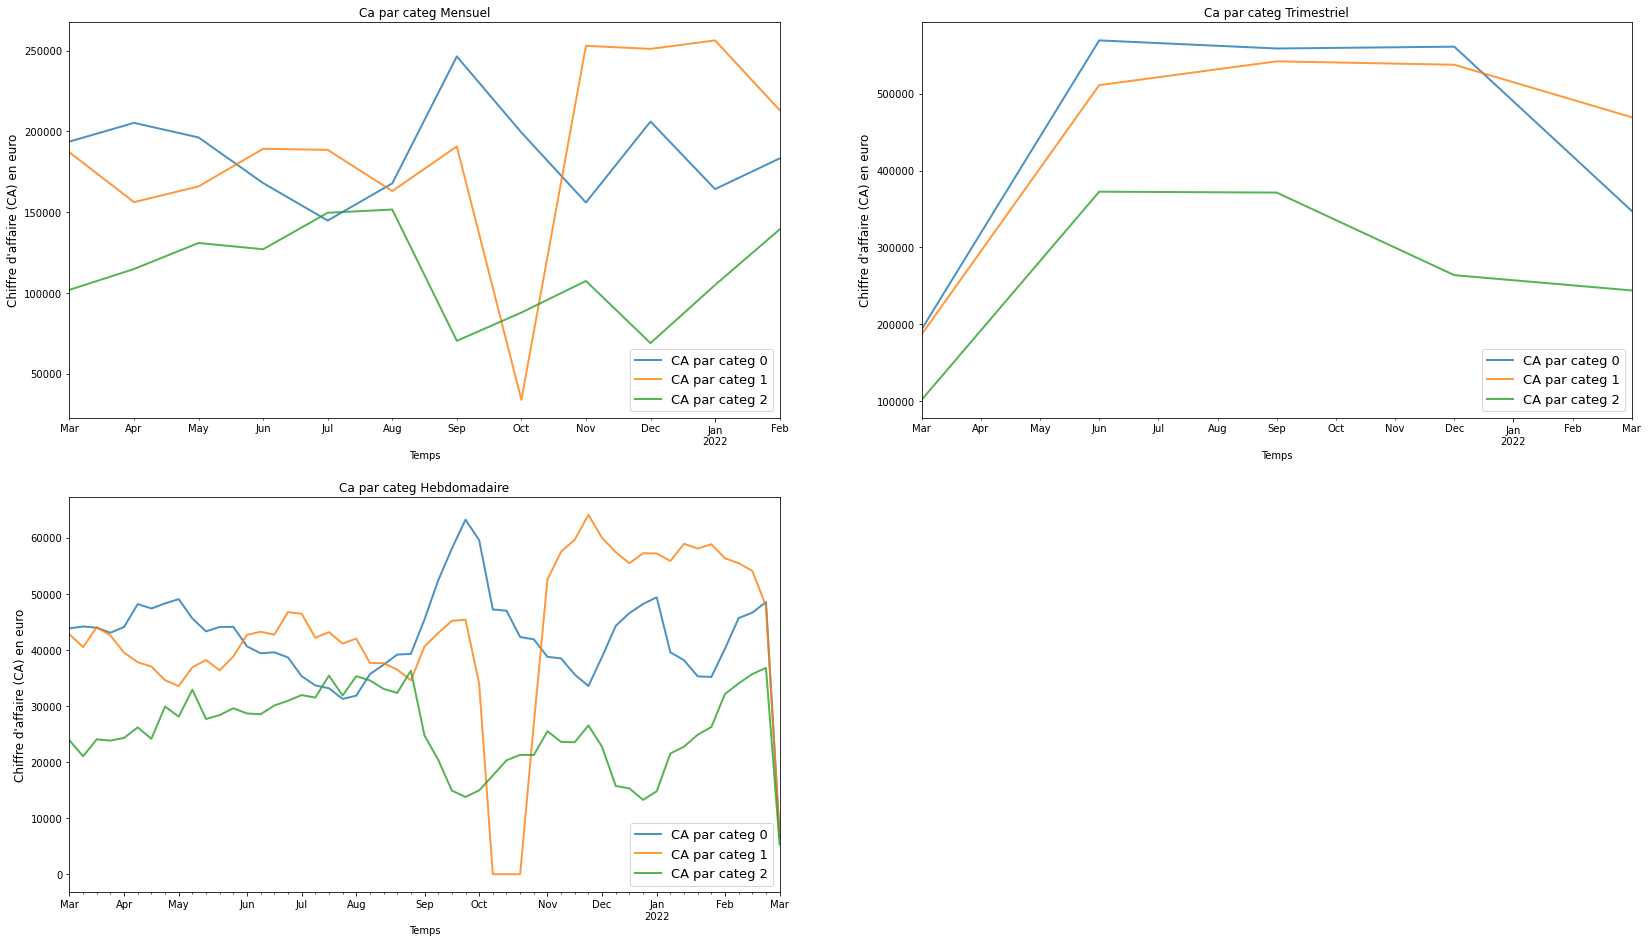

In [7]:
# Création df par categ
cat_0 = df_enrichi[df_enrichi["categ"] == 0]
cat_1 = df_enrichi[df_enrichi["categ"] == 1]
cat_2 = df_enrichi[df_enrichi["categ"] == 2]

# plot de Mars 2021 à Février 2022
plt.figure(figsize=(28,16))

plt.subplot(2,2,3)
cat_0["2021-03":"2022-02"]["price"].resample("W").sum().plot(label="CA par categ 0", lw=2, ls='-', alpha=0.8)
cat_1["2021-03":"2022-02"]["price"].resample("W").sum().plot(label="CA par categ 1", lw=2, ls='-', alpha=0.8)
cat_2["2021-03":"2022-02"]["price"].resample("W").sum().plot(label="CA par categ 2", lw=2, ls='-', alpha=0.8)
plt.title("Ca par categ Hebdomadaire")
plt.xlabel("Temps")
plt.ylabel("Chiffre d'affaire (CA) en euro", fontsize=12)
plt.legend(fontsize=13, loc='lower right')


plt.subplot(2,2,2)
cat_0["2021-03":"2022-02"]["price"].resample("3M").sum().plot(label="CA par categ 0", lw=2, ls='-', alpha=0.8)
cat_1["2021-03":"2022-02"]["price"].resample("3M").sum().plot(label="CA par categ 1", lw=2, ls='-', alpha=0.8)
cat_2["2021-03":"2022-02"]["price"].resample("3M").sum().plot(label="CA par categ 2", lw=2, ls='-', alpha=0.8)
plt.title("Ca par categ Trimestriel")
plt.xlabel("Temps")
plt.ylabel("Chiffre d'affaire (CA) en euro", fontsize=12)
plt.legend(fontsize=13, loc='lower right')


plt.subplot(2,2,1)
cat_0["2021-03":"2022-02"]["price"].resample("M").sum().plot(label="CA par categ 0", lw=2, ls='-', alpha=0.8)
cat_1["2021-03":"2022-02"]["price"].resample("M").sum().plot(label="CA par categ 1", lw=2, ls='-', alpha=0.8)
cat_2["2021-03":"2022-02"]["price"].resample("M").sum().plot(label="CA par categ 2", lw=2, ls='-', alpha=0.8)
plt.title("Ca par categ Mensuel")
plt.xlabel("Temps")
plt.ylabel("Chiffre d'affaire (CA) en euro", fontsize=12)
plt.legend(fontsize=13, loc='lower right')

plt.show()

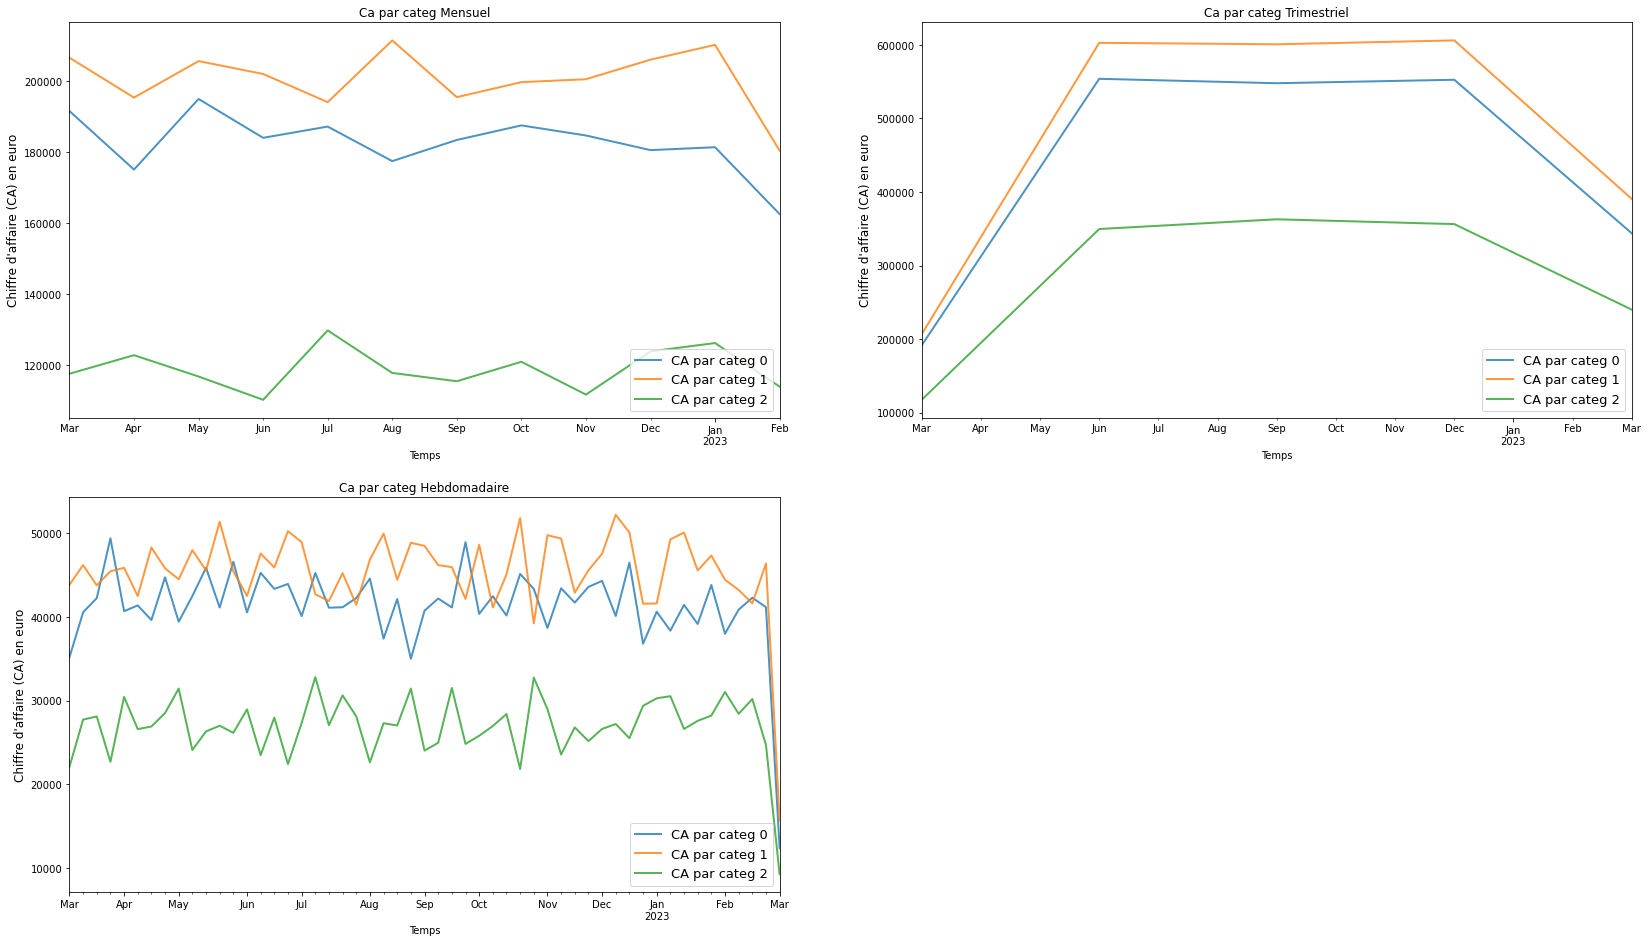

In [8]:
# plot de Mars 2022 à Février 2023
plt.figure(figsize=(28,16))

plt.subplot(2,2,3)
cat_0["2022-03":"2023-02"]["price"].resample("W").sum().plot(label="CA par categ 0", lw=2, ls='-', alpha=0.8)
cat_1["2022-03":"2023-02"]["price"].resample("W").sum().plot(label="CA par categ 1", lw=2, ls='-', alpha=0.8)
cat_2["2022-03":"2023-02"]["price"].resample("W").sum().plot(label="CA par categ 2", lw=2, ls='-', alpha=0.8)
plt.title("Ca par categ Hebdomadaire")
plt.xlabel("Temps")
plt.ylabel("Chiffre d'affaire (CA) en euro", fontsize=12)
plt.legend(fontsize=13, loc='lower right')


plt.subplot(2,2,2)
cat_0["2022-03":"2023-02"]["price"].resample("3M").sum().plot(label="CA par categ 0", lw=2, ls='-', alpha=0.8)
cat_1["2022-03":"2023-02"]["price"].resample("3M").sum().plot(label="CA par categ 1", lw=2, ls='-', alpha=0.8)
cat_2["2022-03":"2023-02"]["price"].resample("3M").sum().plot(label="CA par categ 2", lw=2, ls='-', alpha=0.8)
plt.title("Ca par categ Trimestriel")
plt.xlabel("Temps")
plt.ylabel("Chiffre d'affaire (CA) en euro", fontsize=12)
plt.legend(fontsize=13, loc='lower right')


plt.subplot(2,2,1)
cat_0["2022-03":"2023-02"]["price"].resample("M").sum().plot(label="CA par categ 0", lw=2, ls='-', alpha=0.8)
cat_1["2022-03":"2023-02"]["price"].resample("M").sum().plot(label="CA par categ 1", lw=2, ls='-', alpha=0.8)
cat_2["2022-03":"2023-02"]["price"].resample("M").sum().plot(label="CA par categ 2", lw=2, ls='-', alpha=0.8)
plt.title("Ca par categ Mensuel")
plt.xlabel("Temps")
plt.ylabel("Chiffre d'affaire (CA) en euro", fontsize=12)
plt.legend(fontsize=13, loc='lower right')

plt.show()

<AxesSubplot:xlabel='date_2'>

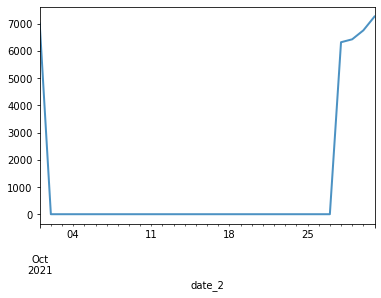

In [9]:
cat_1["2021-10":"2021-10"]["price"].resample("D").sum().plot(label="CA par categ 1", lw=2, ls='-', alpha=0.8)

### 3.4 - Analyse CA-client

In [10]:
ca_client = df_enrichi[["client_id", "price", "session_id"]]
ca_par_client = ca_client[["client_id", "price"]].groupby("client_id").sum()
analyseDataFrame(ca_par_client)

La dimension de DataFrame « ca_par_client » : (8600, 1) (lignes, colonnes)

<class 'pandas.core.frame.DataFrame'>
Index: 8600 entries, c_1 to c_999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   8600 non-null   float64
dtypes: float64(1)
memory usage: 134.4+ KB


None

,price
client_id,
c_1,558.18
c_10,1353.60
c_100,254.85
c_1000,2261.89
c_1001,1812.86


,count,mean,std,min,25%,50%,75%,max
price,8600.0,1378.340544,5182.542488,6.31,547.63,1027.02,1779.5,324033.35


price    8554
dtype: int64

In [11]:
ca_par_client.sort_values(by = "price", ascending = False).head()

,price
client_id,
c_1609,324033.35
c_4958,289760.34
c_6714,153598.92
c_3454,113637.93
c_3263,5276.87


In [12]:
session_client = ca_client.groupby("client_id")["session_id"].value_counts()

session_client

client_id  session_id
c_1        s_114737      5
           s_120172      2
           s_327424      2
           s_105105      1
           s_134971      1
                        ..
c_999      s_88239       1
           s_89648       1
           s_92374       1
           s_98289       1
           s_99070       1
Name: session_id, Length: 342275, dtype: int64

In [13]:
frequence = ca_client.groupby("client_id")["session_id"].count()

frequence

client_id
c_1        39
c_10       58
c_100       8
c_1000    125
c_1001    102
         ... 
c_995      14
c_996      95
c_997      59
c_998      53
c_999      46
Name: session_id, Length: 8600, dtype: int64

In [14]:
price_client = ca_client.groupby("client_id")["price"].value_counts()

price_client

client_id  price
c_1        11.99    6
           10.30    4
           18.94    4
           5.99     3
           8.99     3
                   ..
c_999      20.99    2
           7.98     1
           11.99    1
           16.94    1
           19.49    1
Name: price, Length: 245287, dtype: int64

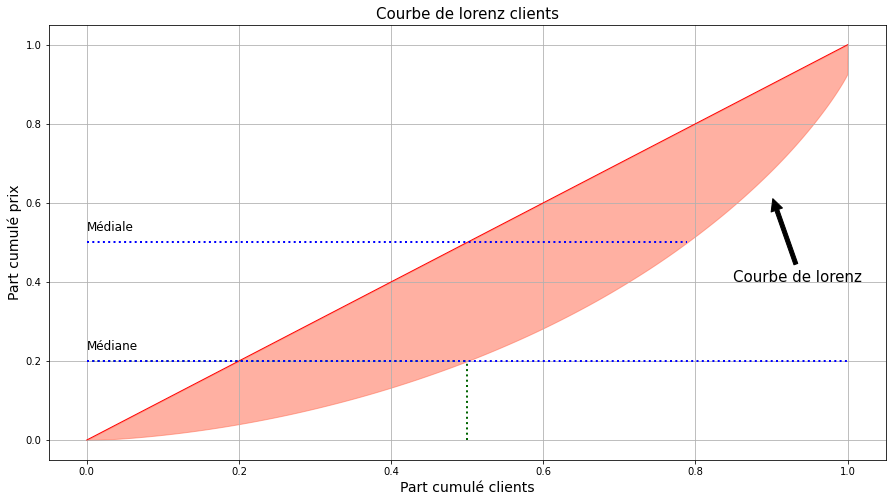

L'indice de Gini est de 0.45 l'inégalité est assez modérée


In [15]:
# calcul de la courbe de lorenz
lorenz_client = ca_par_client['price']

c = len(lorenz_client)
lorenz_client = np.cumsum(np.sort(lorenz_client)) / lorenz_client.sum()
lorenz_client = np.append([0], lorenz_client)


# Affichage de la courbe et de la droite xaxis
xm = np.linspace(0-1/c,1+1/c,c+1)
plt.figure(figsize = (15,8))
plt.grid(True)
plt.plot([0,1], [0,1], "r", linewidth = 1)
plt.fill_between(xm, xm, lorenz_client, color = "tomato", alpha = 0.5)
plt.xlabel("Part cumulé clients", fontsize = 14)
plt.ylabel("Part cumulé prix", fontsize = 14)
plt.annotate("Courbe de lorenz", xy = (0.9, 0.62), xytext = (0.85, 0.4),
            arrowprops = {"facecolor":"black", "shrink":0.05}, fontsize = 15)

# Calcul et visu de la médiane
mediane = lorenz_client[int(round(len(lorenz_client)) / 2)]
plt.plot([0.5, 0.5], [0, mediane], "darkgreen", linestyle = ":", linewidth = 2, label = "Médiane")
plt.plot([0, 0.5], [mediane, mediane], "darkgreen", linestyle = ":", linewidth = 2)
plt.annotate("Médiane", xy =(0, 0.5), xytext = (0, (mediane + 0.03)), fontsize = 12)

# Calcul et visu de la médiale
mediale = len(lorenz_client[lorenz_client <= 0.5]) / len(lorenz_client)
plt.plot([0, mediale], [0.5, 0.5], "blue", linestyle = ":", linewidth = 2, label = "Médiale")
plt.plot([mediane, mediane], "blue", linestyle = ":", linewidth = 2)
plt.annotate("Médiale", xy = (0, 0.5), xytext = (0, 0.53), fontsize = 12)

plt.title("Courbe de lorenz clients", fontsize = 15)
plt.show()

# Affichage de l'indice de Gini
AUC = (lorenz_client.sum() -lorenz_client[-1]/2 -lorenz_client[0]/2)/c # Surface sous la courbe de lorenz
S = 0.5 -AUC # Surface entre la première bissectrice et la courbe de lorenz
gini = 2*S

print("L'indice de Gini est de", round((gini),2), "l'inégalité est assez modérée")

### 3.5 - Moyenne mobile

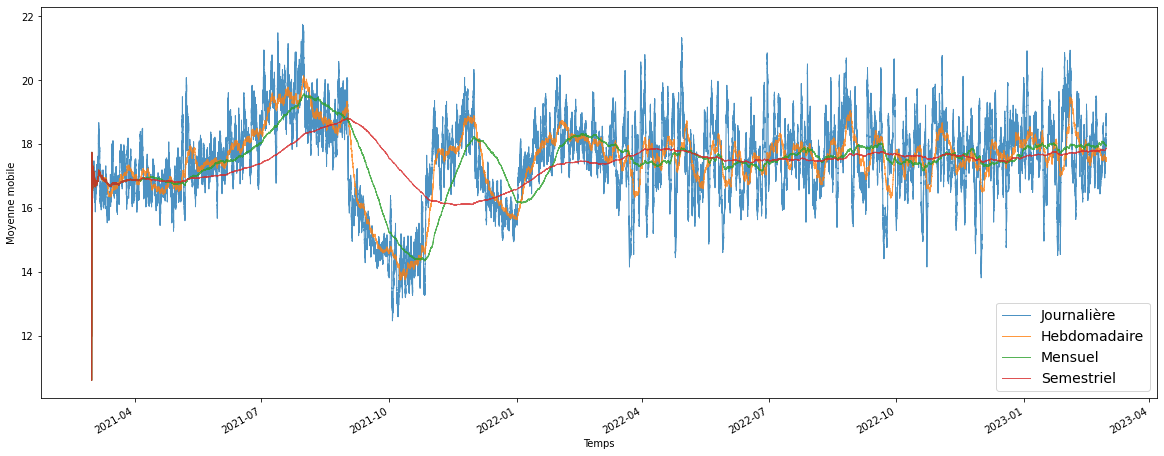

In [16]:
plt.figure(figsize=(20,8))

df_enrichi["2021":"2023"]["price"].rolling("1d").mean().plot(label="Journalière", lw=1, ls="-", alpha=0.8 )
df_enrichi["2021":"2023"]["price"].rolling("7d").mean().plot(label="Hebdomadaire", lw=1, ls="-", alpha=0.8 )
df_enrichi["2021":"2023"]["price"].rolling("30d").mean().plot(label="Mensuel", lw=1, ls="-", alpha=0.8 )
df_enrichi["2021":"2023"]["price"].rolling("90d").mean().plot(label="Semestriel", lw=1, ls="-", alpha=0.8 )
plt.xlabel("Temps")
plt.ylabel("Moyenne mobile")
plt.legend(fontsize=14)

plt.show()

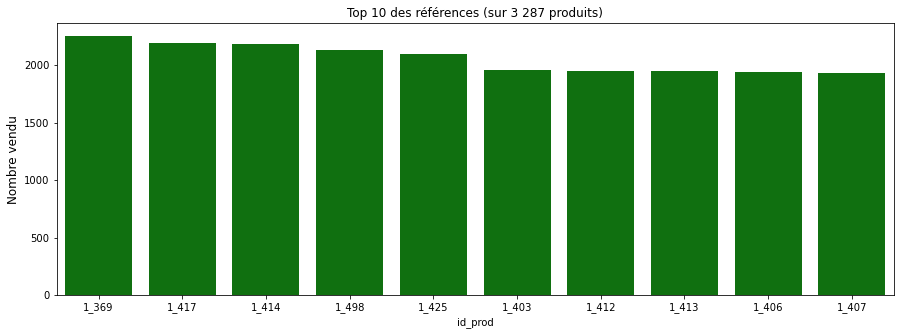

,id_prod,categ,price,Nombre vendu
0,1_369,1.0,23.99,2252
1,1_417,1.0,20.99,2189
2,1_414,1.0,23.83,2180
3,1_498,1.0,23.37,2128
4,1_425,1.0,16.99,2096
5,1_403,1.0,17.99,1960
6,1_412,1.0,16.65,1951
7,1_413,1.0,17.99,1945
8,1_406,1.0,24.81,1939
9,1_407,1.0,15.99,1935


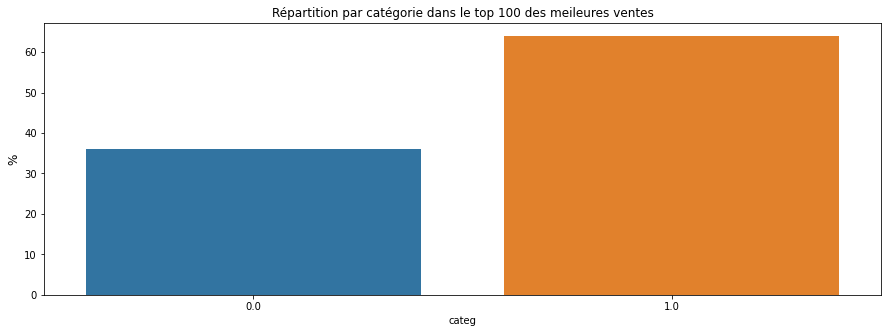

In [22]:
#Analyse des tops et des flops
df_temp=df_enrichi.copy()


#Les tops

df_top=df_temp.groupby(['id_prod','categ','price']).size().sort_values(ascending=False).head(10).reset_index(name="Nombre vendu")

#Affichage du graphique 
mem=plt.figure(figsize=(15,5))
mem=sns.barplot(x='id_prod',y='Nombre vendu',data=df_top,color='green')
mem=plt.title("Top 10 des références (sur 3 287 produits)")
mem=plt.ylabel('Nombre vendu', fontsize=12)
mem=plt.show()
display(df_top)

#Analyse catégorie "star" dans les 100 premiers produits
df_memo=df_temp.groupby(['id_prod','categ']).size().sort_values(ascending=False).head(100).reset_index(name="Nombre vendu")
df_top_100=df_memo.groupby(['categ']).size().sort_values(ascending=False).reset_index(name="Nombre categ")
mem=plt.figure(figsize=(15,5))
mem=sns.barplot(x='categ',y='Nombre categ',data=df_top_100)
mem=plt.title("Répartition par catégorie dans le top 100 des meileures ventes")
mem=plt.ylabel('%', fontsize=12)
mem=plt.show()

La catégorie 1 comporte le plus de produits vendus ainsi que la plus grande part de chiffre d'affaires.

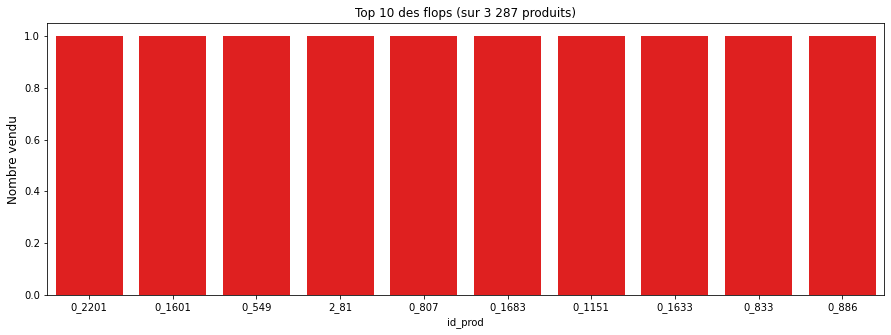

,id_prod,categ,price,Nombre vendu
0,0_2201,0.0,20.99,1
1,0_1601,0.0,1.99,1
2,0_549,0.0,2.99,1
3,2_81,2.0,86.99,1
4,0_807,0.0,1.99,1
5,0_1683,0.0,2.99,1
6,0_1151,0.0,2.99,1
7,0_1633,0.0,24.99,1
8,0_833,0.0,2.99,1
9,0_886,0.0,21.82,1


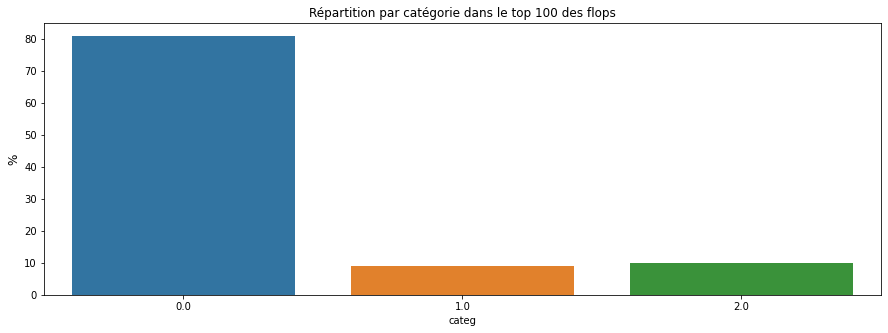

In [21]:
#Les flops
df_flop=df_temp.groupby(['id_prod','categ','price']).size().sort_values(ascending=True).head(10).reset_index(name="Nombre vendu")
#Affichage du graphique 
mem=plt.figure(figsize=(15,5))
mem=sns.barplot(x='id_prod',y='Nombre vendu',data=df_flop,color='red')
mem=plt.title("Top 10 des flops (sur 3 287 produits)")
mem=plt.ylabel('Nombre vendu', fontsize=12)
mem=plt.show()
display(df_flop)


#Analyse catégorie "star" dans les 100 premiers produits
df_memo=df_temp.groupby(['id_prod','categ']).size().sort_values(ascending=True).head(100).reset_index(name="Nombre vendu")
df_flop_100=df_memo.groupby(['categ']).size().sort_values(ascending=False).reset_index(name="Nombre categ")
mem=plt.figure(figsize=(15,5))
mem=sns.barplot(x='categ',y='Nombre categ',data=df_flop_100)
mem=plt.title("Répartition par catégorie dans le top 100 des flops")
mem=plt.ylabel('%', fontsize=12)
mem=plt.show()